# Données de Henley

Les données de Henley (1969) concernent une expérience de rappel
libre. 

L'expérience était la suivante : on a demandé à des
sujets d'écrire une liste de tous les animaux auxquels ils pouvaient penser en
un temps limité. 

Le but de cette expérience est d'analyser le comportement de la mémoire. Deux
animaux proches dans une liste montre qu'ils sont proches dans la mémoire des
sujets  et inversement deux animaux éloignés dans une même liste montre
qu'ils doivent être *rangés* séparément dans le cerveau du sujet et ils se
retrouvent dans la même liste par association d'idées successives.


N'ont été conservés dans la table que les animaux présents
dans toutes les listes ou presque, la dissimilarité entre deux animaux donnés
correspondant aux nombres moyens d'animaux entre eux (à la gestion des animaux
absents de certaines listes près). On pourra se référer à Henley (1969)
pour des renseignements plus précis concernant la création de cette
dissimilarité.

**Remarque** : Si cela vous amuse, essayez de créer votre propre distance de Henley avec les autres étudiants. Ca dnne souvent des résultats rigolo et, au final, très interprétables. En utilisant les données du fichier, vous regardez l'intérieur du cerveaux d'étudiants américain des années 1970 et non dans celui d'élèves de 2020.


## Lecture des données

Le fichier `henley.mat` contient une matrice triangulaire inférieure contenant les données

In [1]:
print(open('henley.mat').read())

Ours   0.0  
Chat   47.2 0.0  
Vache  27.7 30.9 0.0  
Cerf   40.1 56.1 43.6 0.0  
Chien  49.6 2.2  30.2 50.9 0.0  
Chevre 19.1 29.0 11.0 44.5 17.0 0.0  
Cheval 29.0 25.3 7.7  43.0 24.0 7.2  0.0  
Lion   22.6 24.1 24.5 44.7 26.9 23.1 28.6 0.0  
Souris 29.5 24.8 34.1 39.9 27.5 39.6 32.6 33.2 0.0  
Cochon 21.4 43.0 17.0 41.1 45.0 19.5 25.7 29.3 34.9 0.0  
Lapin  20.3 41.5 27.9 19.9 39.4 21.8 30.1 33.3 22.6 25.9 0.0  
Mouton 16.1 47.0 8.2  53.1 46.8 1.8  15.2 35.0 51.9 19.6 32.5 0.0


Le code suivant crée une matrice carrée `d` de distance et les noms des animaux dans la liste `elements`

In [2]:
# crée 
elements = []
d = []
for line in open('henley.mat'):
    token = line.split()
    elements.append(token[0])
    d.append([])
    for x in token[1:]:
        d[-1].append(float(x))
    
    for i, d_line in enumerate(d[:-1]):
        d_line.append(d[-1][i])

In [3]:
elements

['Ours',
 'Chat',
 'Vache',
 'Cerf',
 'Chien',
 'Chevre',
 'Cheval',
 'Lion',
 'Souris',
 'Cochon',
 'Lapin',
 'Mouton']

In [4]:
d

[[0.0, 47.2, 27.7, 40.1, 49.6, 19.1, 29.0, 22.6, 29.5, 21.4, 20.3, 16.1],
 [47.2, 0.0, 30.9, 56.1, 2.2, 29.0, 25.3, 24.1, 24.8, 43.0, 41.5, 47.0],
 [27.7, 30.9, 0.0, 43.6, 30.2, 11.0, 7.7, 24.5, 34.1, 17.0, 27.9, 8.2],
 [40.1, 56.1, 43.6, 0.0, 50.9, 44.5, 43.0, 44.7, 39.9, 41.1, 19.9, 53.1],
 [49.6, 2.2, 30.2, 50.9, 0.0, 17.0, 24.0, 26.9, 27.5, 45.0, 39.4, 46.8],
 [19.1, 29.0, 11.0, 44.5, 17.0, 0.0, 7.2, 23.1, 39.6, 19.5, 21.8, 1.8],
 [29.0, 25.3, 7.7, 43.0, 24.0, 7.2, 0.0, 28.6, 32.6, 25.7, 30.1, 15.2],
 [22.6, 24.1, 24.5, 44.7, 26.9, 23.1, 28.6, 0.0, 33.2, 29.3, 33.3, 35.0],
 [29.5, 24.8, 34.1, 39.9, 27.5, 39.6, 32.6, 33.2, 0.0, 34.9, 22.6, 51.9],
 [21.4, 43.0, 17.0, 41.1, 45.0, 19.5, 25.7, 29.3, 34.9, 0.0, 25.9, 19.6],
 [20.3, 41.5, 27.9, 19.9, 39.4, 21.8, 30.1, 33.3, 22.6, 25.9, 0.0, 32.5],
 [16.1, 47.0, 8.2, 53.1, 46.8, 1.8, 15.2, 35.0, 51.9, 19.6, 32.5, 0.0]]

## Hiérarchie

Nos données sont déjà décrite par une distance, il faut faire un peu attention dans l'utilisation de l'algortihme [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) :

- il faut dire à sklearn que nos données sont une distance (par défaut nos données sont considérées come étant des détaframes). Ceci se fait avec l'attribut `affinity`
- il faut présiser la méthdoe d'agrégation. On ne peut utiilser `ward`, qui est la méthode par défaut car ne s'applique qu'à des dataframe. On a 3 méthodes possible : `average`, `single` et `complete`.

Faites les 3 méthodes d'agrégations.

In [5]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

import pandas

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set()
current_palette = sns.color_palette()

### lien moyen

In [6]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0,
                                    metric="precomputed",
                                    linkage="average").fit(d)

fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], 
                             columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)

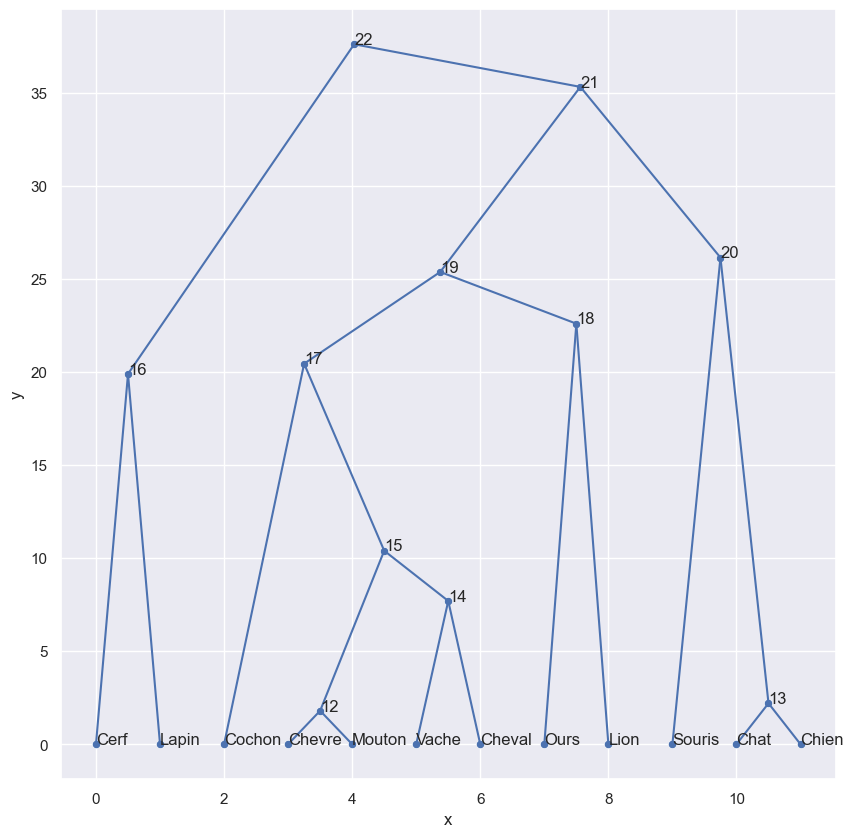

In [7]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    if i < len(elements):
        label = elements[i]
    else:
        label = str(i)
    ax.text(row['x'], row['y'], label)
    
plt.show()

### lien simple

In [8]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0,
                                    metric="precomputed",
                                    linkage="single").fit(d)

fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], 
                             columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)

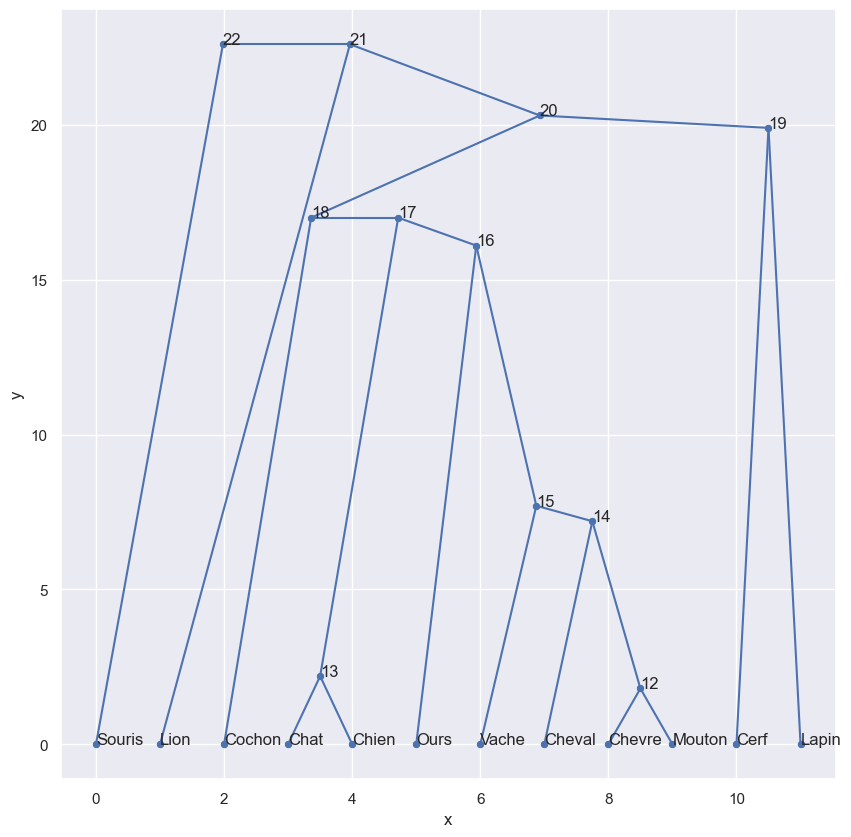

In [9]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    if i < len(elements):
        label = elements[i]
    else:
        label = str(i)
    ax.text(row['x'], row['y'], label)
    
plt.show()

### lien complet

In [10]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0,
                                    metric="precomputed",
                                    linkage="complete").fit(d)

fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], 
                             columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)

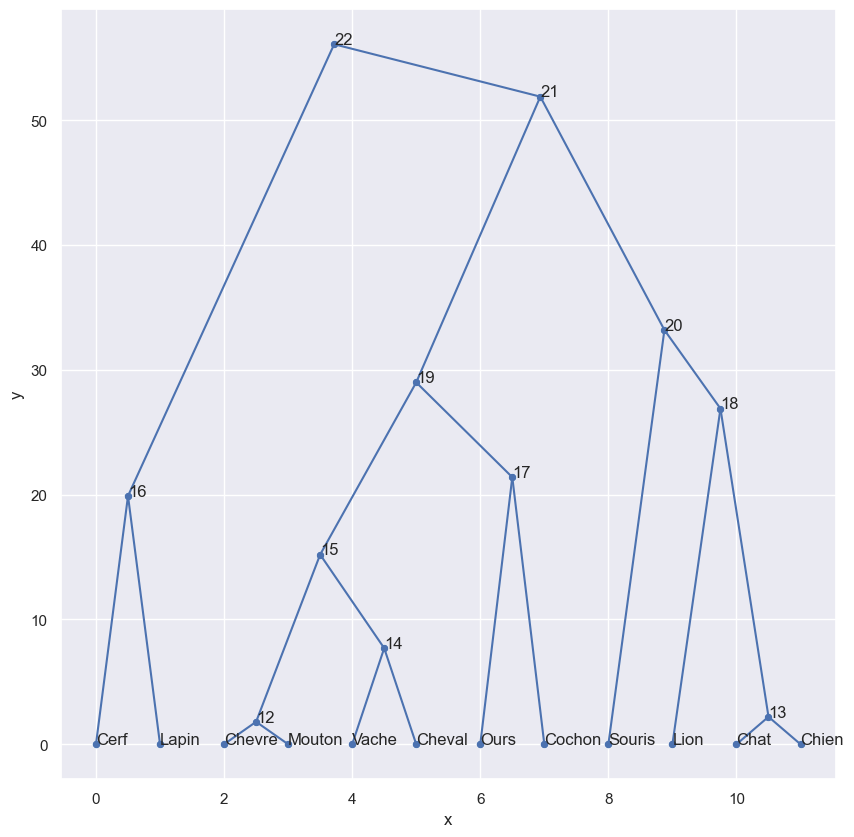

In [11]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    if i < len(elements):
        label = elements[i]
    else:
        label = str(i)
    ax.text(row['x'], row['y'], label)
    
plt.show()

## MDS classique

Faite une représentation en 2d des animaux en utilisant le MDS classique

In [12]:
from sklearn import manifold

In [13]:
mds = manifold.MDS(n_components=2, max_iter=3000,
                   dissimilarity="precomputed", n_jobs=1)

pos = mds.fit(d).embedding_

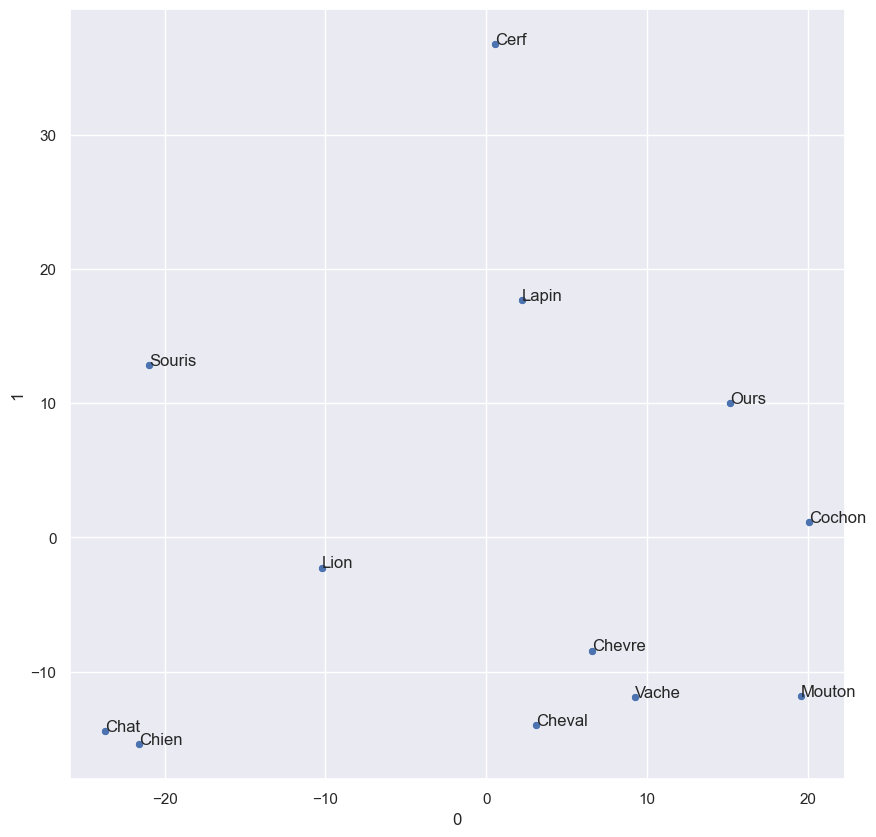

In [14]:
data = pandas.DataFrame(pos)
data.columns=(str(x) for x in data.columns) # pour ce fichu bug

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='0', 
                y='1', 
                data=data,
                legend=False,
                ax=ax)

for i, row in data.iterrows():
    label = elements[i]
    ax.text(row['0'], row['1'], label)
    
plt.show()

## Isomap

Que donne les méthodes isomap ? Essayez plusieurs plus proches voisins

In [15]:
mds = manifold.Isomap(n_neighbors=3,
                      n_components=2, max_iter=3000,                      
                      metric="precomputed")

pos = mds.fit(d).embedding_

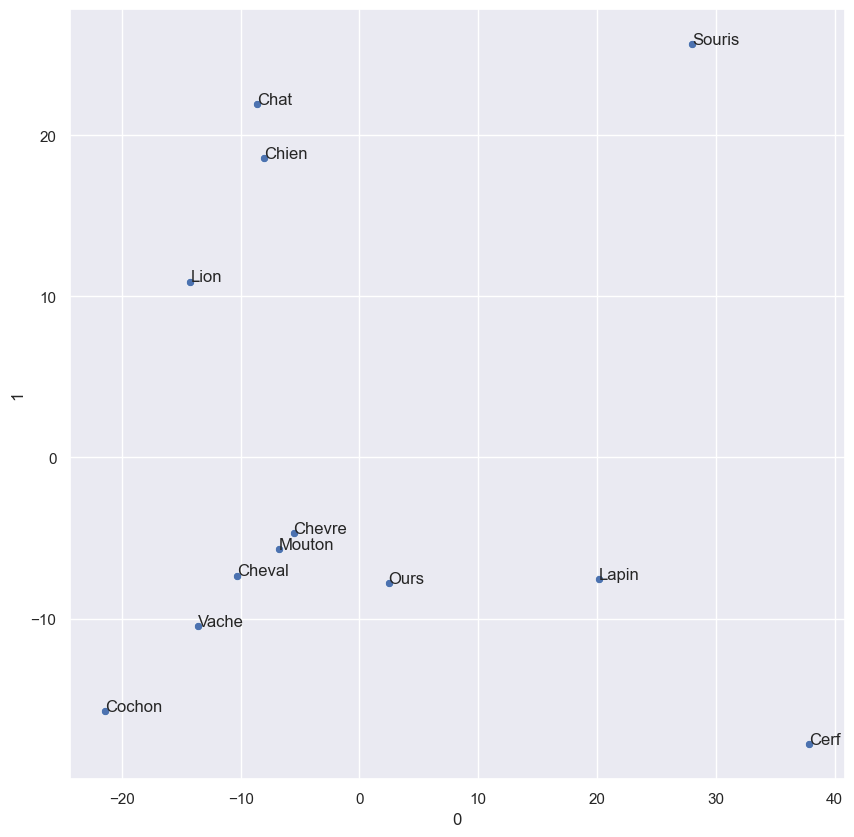

In [16]:
data = pandas.DataFrame(pos)
data.columns=(str(x) for x in data.columns) # pour ce fichu bug

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='0', 
                y='1', 
                data=data,
                legend=False,
                ax=ax)

for i, row in data.iterrows():
    label = elements[i]
    ax.text(row['0'], row['1'], label)
    
plt.show()